In [1]:
# Notebook for calculating the 
# vibronic spectra
# This program fits potential energy surfaces
# and sets up the necessary DVR calculations
# Notebook is annotated where the DVR calculation must
# be executed before continuing 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [18]:
import scipy

In [19]:
import pandas as pd

In [20]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [21]:
from scipy.interpolate import interp1d

In [22]:
from dvr_setup_and_plotting_utils import *

88.1188
potential written
dvr is set up


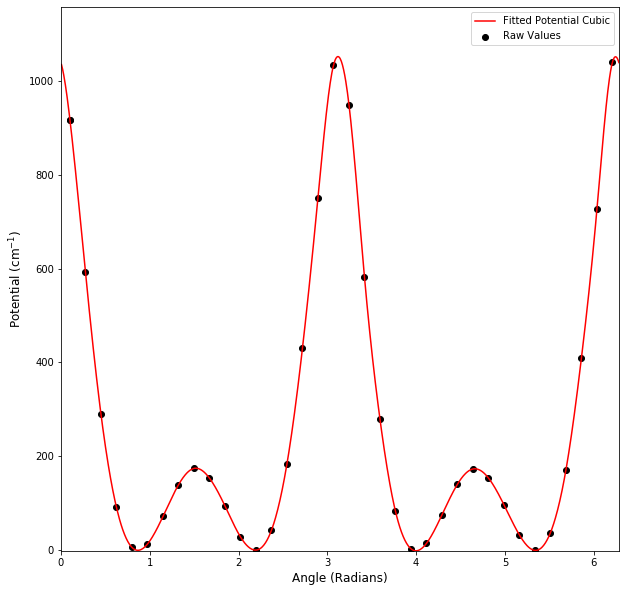

In [41]:
# Run and collect ground state information
# Reduced mass of freqency calculation =  4.0054 AMU

# Final fitted result worked best with the following fitted mass

mass_ground = 4.0054*1836*22
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500 # This number is N, number of points in DVR is 2N+1

# Linear fit used in production 
# Cubic fit also written 

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='gs_scan_with_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)


print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_with_water_fitted.dat',
                        output_file_name='gs_scan_with_h2o')

print('dvr is set up')


In [10]:
# At this point in the directory where the files are made
# ! cp gs_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


84.4888
potential written
dvr is set up


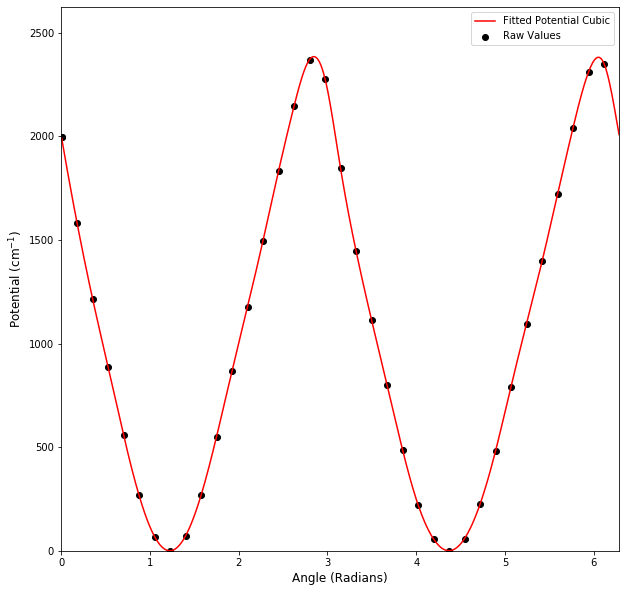

In [25]:
# Now setup and run the excited state excited state
# Reduced mass from excited state vibrational frequency calculation is 3.8404 

mass_excited =  3.8404*1836*22
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='es_scan_with_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_with_water_fitted.dat',
                        output_file_name='es_scan_with_h2o')

print('dvr is set up')

In [11]:
# At this point in the directory where the files are made
# ! cp es_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above


In [26]:
# Square overlaps calculated here

In [27]:
wavefunction_overlaps = read_wavefunctions_calculate_overlaps_vib_shift(
                                         ground_state_file_name_root='gs_scan_with_h2o',
                                         excited_state_file_name_root='es_scan_with_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=2000,
                                         vib_shift=195.0,
                                        vib_scale=1.0)

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 3.4745013083764102
Calculating overlap for transition with energy 72.79294424660311
Calculating overlap for transition with energy 83.82325923581575
Calculating overlap for transition with energy 144.71816063648222
Calculating overlap for transition with energy 162.9484083040655
Calculating overlap for transition with energy 216.1669533124154
Calculating overlap for transition with energy 240.91219110362417
Calculating overlap for transition with energy 287.1790900859578
Calculating overlap for transition with energy 317.6476328760407
Calculating overlap for transition with energy 357.69087162004047
Calculating overlap for transition with energy 393.16570916369255
Calculating overlap for transition with energy 427.5713805489753
Calculating overlap for transition with energy 467.40457654002677
Calculating overlap for transition with energy 496.70870409848504
Calculating overlap for transiti

Calculating overlap for transition with energy 947.5012128515566
Calculating overlap for transition with energy 950.5399816265256
Calculating overlap for transition with energy 1010.2972899448297
Calculating overlap for transition with energy 1010.4038713515291
Calculating overlap for transition with energy 1068.9361864629504
Calculating overlap for transition with energy 1072.055731704106
Calculating overlap for transition with energy 1126.5909908904287
Calculating overlap for transition with energy 1132.621122230389
Calculating overlap for transition with energy 1183.3676196070544
Calculating overlap for transition with energy 1192.2608078615217
Calculating overlap for transition with energy 1239.369246302897
Calculating overlap for transition with energy 1251.1024932409057
Calculating overlap for transition with energy 1294.7135767488396
Calculating overlap for transition with energy 1309.245358730034
Calculating overlap for transition with energy 1349.507496442229
Calculating overl

In [28]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_with_h2o_0',
 'excited_state_id': 'es_scan_with_h2o_0',
 'overlap': 1.661159100720564e-07}

In [29]:
# Turn list of dictionaries into a dataframe
overlap_df = pd.DataFrame(wavefunction_overlaps)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


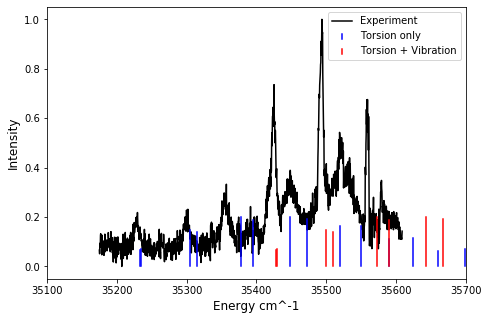

In [30]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum
# Use same color scheme as experimental section

# Exp files: PhPyH2O UV Spectrum.txt
# Exp file 2: PhPyH2O UV Spectrum.txt 

# Offset slightly different if ZPE effects included or not 

offset = 35233

kidwell_uv_spectrum_energy = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 


ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
ax.set_xlim(35100,35700)
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# In principle can 
# scale the overlaps that involve the second vibrationale xcited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)



wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)



ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion only',
       basefmt=" ")


ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_compare_mass_with_water_for_presentation.pdf')
plt.show()

In [31]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    return frequencies,intensities


In [32]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-50,max_freq=offset+1000,width=10.0,resolution=0.5)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


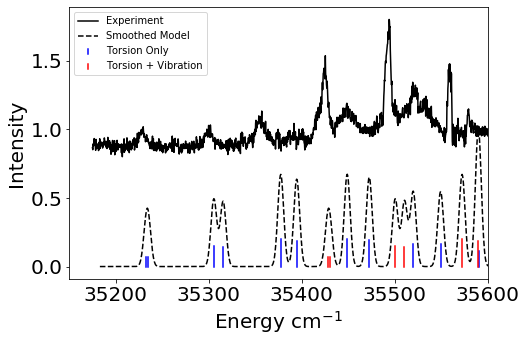

In [33]:
# Plot with both spectra on each other

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.set_xlim(35150,35600)

max_freq = 38000
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Might need to normalize

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)



ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")


ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_with_water_for_presentation.pdf',bbox_inches='tight')
plt.show()



In [34]:
# Generate plots of the wavefunctions
# or squares of the wavefunctions
ground_state_file_name_root='gs_scan_with_h2o'
excited_state_file_name_root='es_scan_with_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [35]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_with_h2o_0


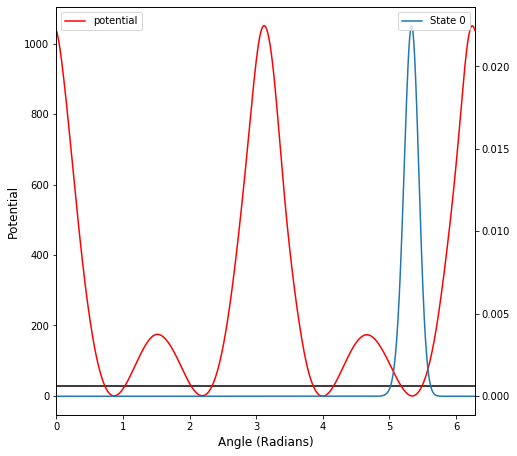

Examining state gs_scan_with_h2o_1


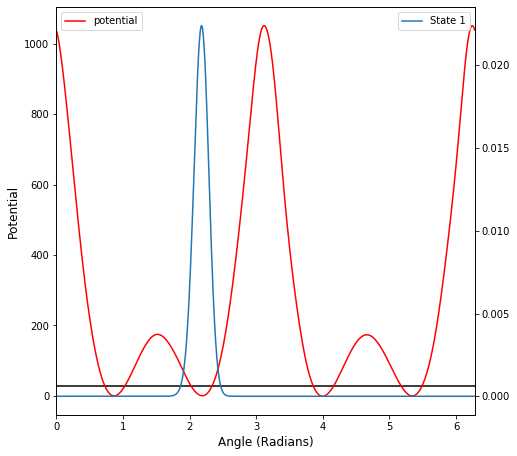

Examining state gs_scan_with_h2o_2


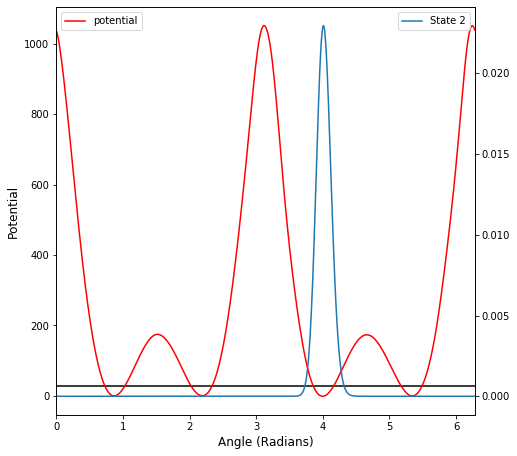

Examining state gs_scan_with_h2o_3


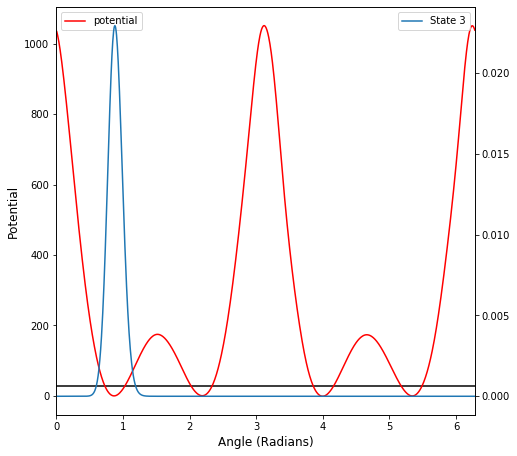

In [36]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential


wavefunction_counter = 0

max_wavefunctions = 4

prefix = "kidwell_gs_scan_with_h2o"

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_with_h2o_",
                      plotting_potential_name="gs_scan_with_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

Examining state es_scan_with_h2o_1


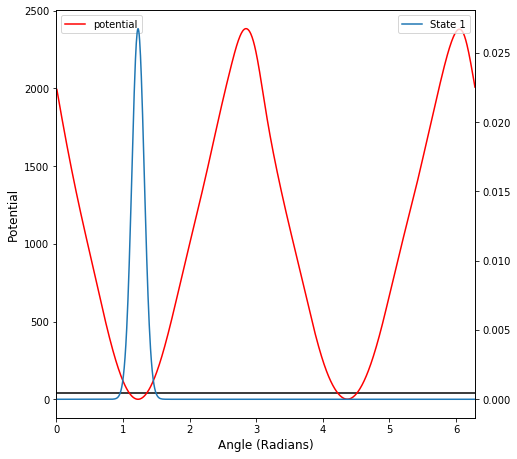

Examining state es_scan_with_h2o_3


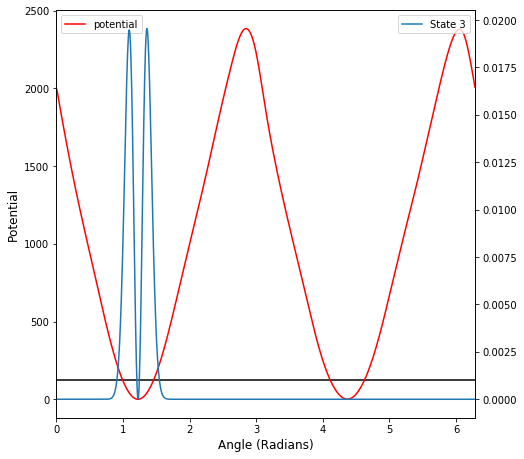

Examining state es_scan_with_h2o_2


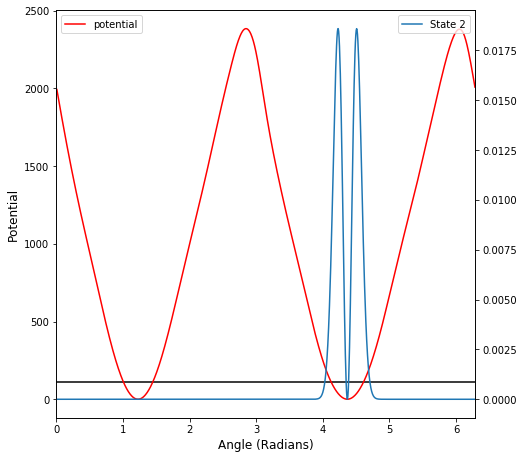

Examining state es_scan_with_h2o_0


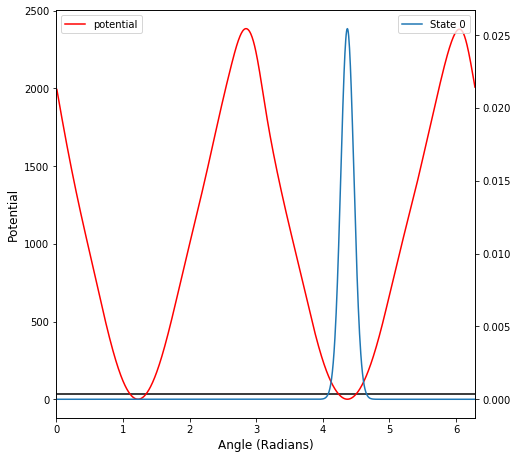

Examining state es_scan_with_h2o_4


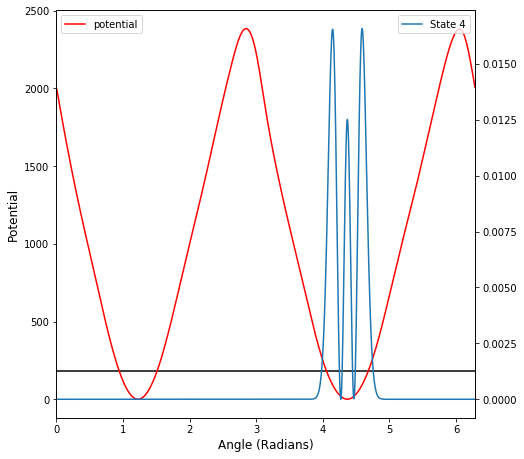

Examining state es_scan_with_h2o_36


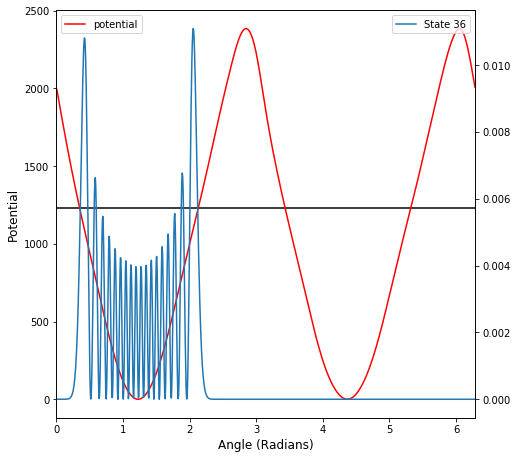

In [42]:
# Excited state square plot

excited_state_plot_list = [1,3,2,0,4,36]

for state in excited_state_plot_list:
    plot_wavefunction_squared(state_dict=excited_state_dict,
                        state_num=state,prefix="es_scan_with_h2o_",
                      plotting_potential_name="es_scan_with_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground)


In [37]:
# Get maximum overlaps to plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(20)

,energy,ground_state_id,excited_state_id,overlap
254,0.000984,gs_scan_with_h2o_2,es_scan_with_h2o_6,0.199887
255,0.001872,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_6_vib_excited,0.199887
250,0.000658,gs_scan_with_h2o_2,es_scan_with_h2o_4,0.199507
251,0.001547,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_4_vib_excited,0.199507
378,0.001980,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_7_vib_excited,0.193430
377,0.001092,gs_scan_with_h2o_3,es_scan_with_h2o_7,0.193430
374,0.001625,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_5_vib_excited,0.189407
373,0.000737,gs_scan_with_h2o_3,es_scan_with_h2o_5,0.189407
381,0.001441,gs_scan_with_h2o_3,es_scan_with_h2o_9,0.162400
382,0.002330,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_9_vib_excited,0.162400


In [38]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_h2o_overlap_list_no_zpe.csv')

In [ ]:
# plot potentials with energy levels

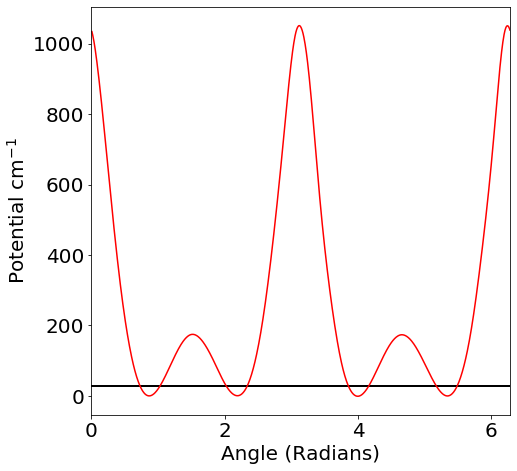

In [39]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="kidwell_gs_scan_with_h2o",
                      plotting_potential_name="gs_scan_with_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=70)

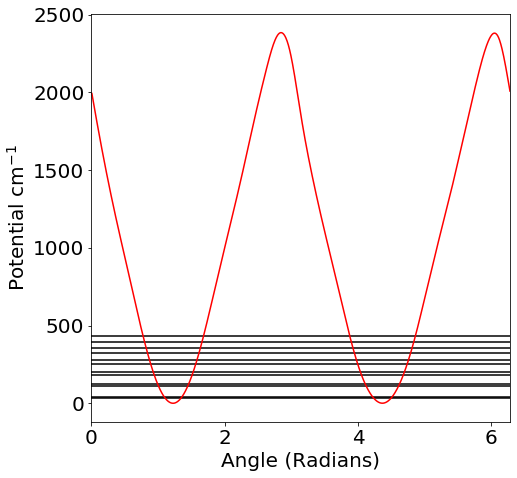

In [40]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="kidwell_es_scan_with_h2o",
                      plotting_potential_name="es_scan_with_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=450)